# Supermart Grocery Sales - Retail Analytics Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
from datetime import datetime
from dython.nominal import associations
import squarify   

In [2]:
record = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
record.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [3]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [4]:
# Shape of the dataframe
record.shape

(9994, 11)

# Convert the Order date to datetime

In [5]:
record["Order Date"] = pd.to_datetime(record["Order Date"])

# Lets answer the following questions
1. which category of product is most profitable?
2.  Region with highest sales by product
3. which region by state made highest and lowest profit ?
4. Average sales volume for each year? 
5. Any repeating customer
6. Most dicounted and profitable product category

## Checking feature relationships, if there are any correleation between them =>  you can see profit increases as sales increses(postive correlation)

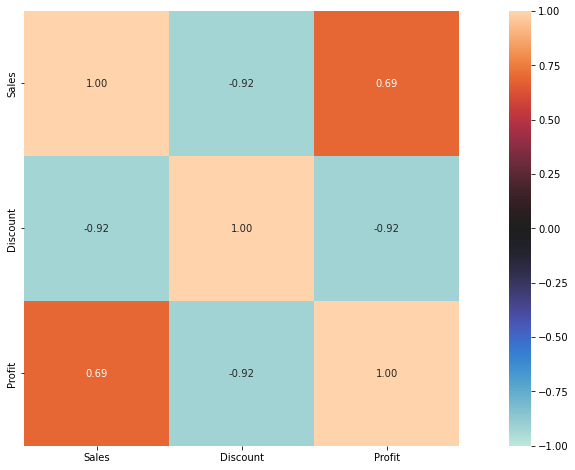

{'corr':              Sales  Discount    Profit
 Sales     1.000000 -0.922877  0.694809
 Discount -0.922877  1.000000 -0.918181
 Profit    0.694809 -0.918181  1.000000,
 'ax': <AxesSubplot:>}

In [6]:
associations(record.corr(),figsize =(18,8))

# which category of product is most profitable?

In [7]:
profitable_prod = record.loc[:,["Category","Profit"]].groupby(["Category"]).sum().sort_values\
    ("Profit",ascending  = False)
profitable_prod

,Profit
Category,
Snacks,568178.85
"Eggs, Meat & Fish",567357.22
Fruits & Veggies,530400.38
Food Grains,529162.64
Bakery,528521.06
Beverages,525605.76
Oil & Masala,497895.29


In [8]:
record.Profit.sum()

3747121.1999999997

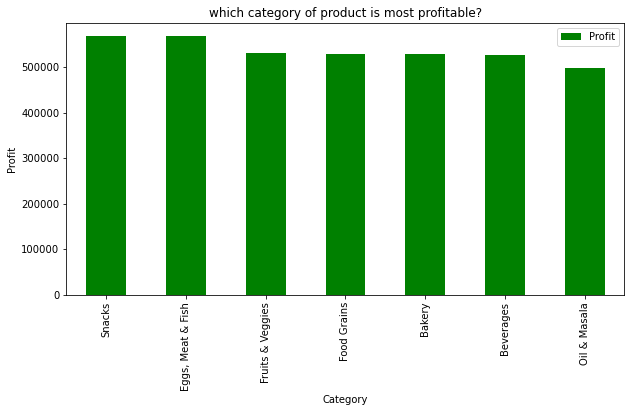

In [9]:
# ploting a bar chart to show the table
fig,ax = plt.subplots(figsize = (10, 5))
profitable_prod.plot( ax = ax, kind = 'bar', color = 'green', ylabel =\
     "Profit", title = "which category of product is most profitable?");

# Region with highest sales by product

In [10]:
rhs = record.loc[:,["Region","Category","Sales"]].pivot_table(index = "Region", columns ="Category", values ="Sales", aggfunc= "sum")
rhs

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Region,,,,,,,
Central,448343.0,501194.0,516642.0,463683.0,526507.0,453293.0,558494.0
East,588241.0,577206.0,677830.0,598868.0,564237.0,622071.0,619915.0
North,NaN,NaN,NaN,NaN,NaN,1254.0,NaN
South,361385.0,344666.0,360963.0,353069.0,352162.0,298859.0,369357.0
West,714312.0,662247.0,711966.0,699652.0,657821.0,662965.0,689780.0


<AxesSubplot:xlabel='Region'>

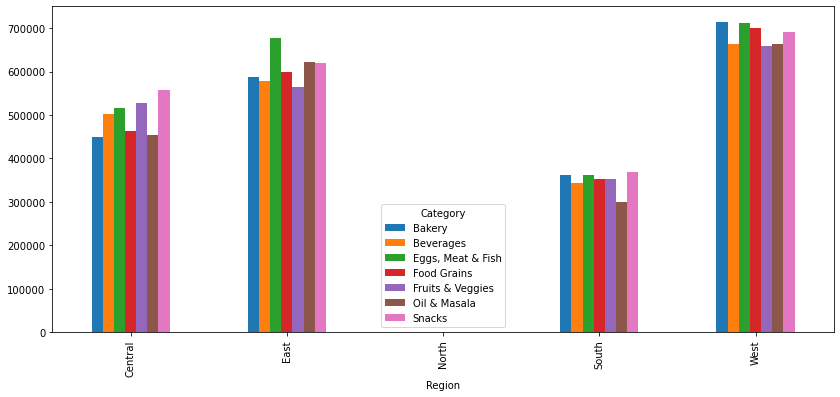

In [11]:
fig,ax = plt.subplots(figsize = (10, 4))
rhs.plot(kind = "bar", figsize = (14,6), ax= ax)

# Which region by state made highest and lowest profit ?

In [12]:
region_profit = record.loc[:,["Region","State","Profit"]].groupby(["Region","State"]).sum().sort_values("Profit",ascending= False)
region_profit

,,Profit
Region,State,
West,Tamil Nadu,1192004.61
East,Tamil Nadu,1074345.58
Central,Tamil Nadu,856806.84
South,Tamil Nadu,623562.89
North,Tamil Nadu,401.28


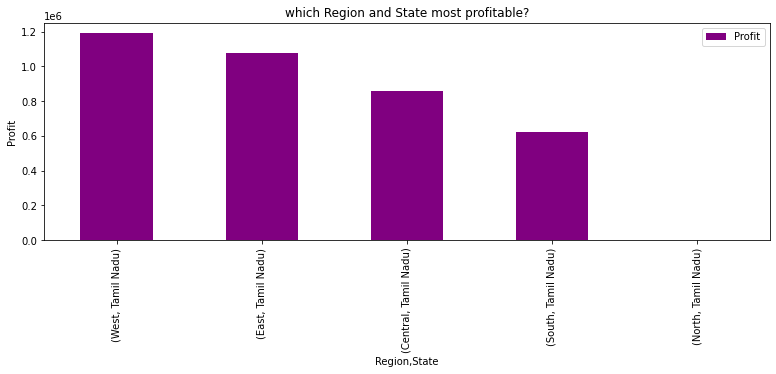

In [13]:
fig,ax = plt.subplots(figsize = (13, 4))
region_profit.plot(kind = "bar", ax= ax, color =["purple"],  ylabel =\
     "Profit", title = "which Region and State most profitable?" );


# Average sales volume for each year? 

In [14]:
record["year"] = record["Order Date"].dt.year

In [15]:
yearly_profit = record.loc[:,["year","Profit"]].sort_values('Profit',ascending = False).set_index("year").groupby("year").sum().\
    sort_values("Profit", ascending= False).reset_index().set_index("year")
yearly_profit 

,Profit
year,
2018,1244182.88
2017,953216.22
2016,797192.99
2015,752529.11


# 93k average profit

In [16]:
yearly_profit.mean()

Profit    936780.3
dtype: float64

# Year with highest profit 

array([<AxesSubplot:ylabel='Profit'>], dtype=object)

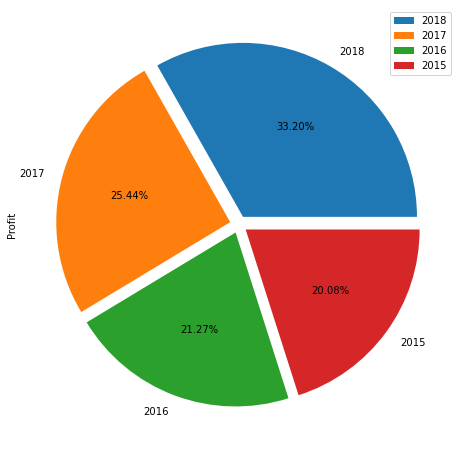

In [17]:
yearly_profit.plot(kind = "pie", subplots = True, figsize =(8,8),autopct = "%1.2f%%", explode = [0.05,0.05,0.05,0.05])

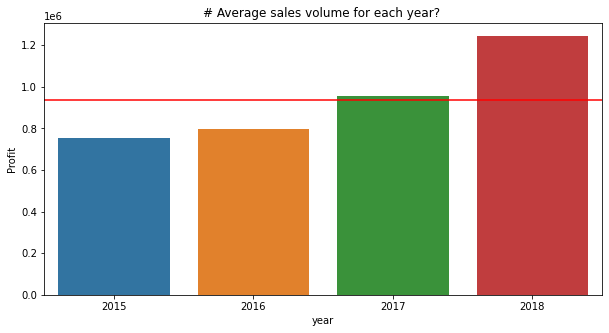

In [18]:
fig,ax = plt.subplots(figsize = (10, 5))
ax.axhline(yearly_profit.Profit.mean(), color='red', linestyle='-')
sns.barplot(x =yearly_profit.index, y=yearly_profit.Profit)
ax.set( xlabel ="year", ylabel= "Profit", title ="# Average sales volume for each year? " );

# Any repeating Unique customer name over the years?

### 50 Unique Customer names

In [19]:
record["Customer Name"].nunique()

50

In [27]:
cust_cat = record.loc[:,"Customer Name"].value_counts().rename("counts").to_frame().sort_values('counts',ascending = False)
cust_cat["label"] = [i for i in cust_cat.index]
cust_cat [:3]

,counts,label
Amrish,227,Amrish
Krithika,224,Krithika
Verma,218,Verma


In [28]:
loop = []
for l, c in zip (cust_cat.label, cust_cat.counts):
    loop.append([l,c]) 

len(loop)

50

In [29]:
cust_cat["labelled"] = loop
cust_cat[:6]

,counts,label,labelled
Amrish,227,Amrish,"[Amrish, 227]"
Krithika,224,Krithika,"[Krithika, 224]"
Verma,218,Verma,"[Verma, 218]"
Arutra,218,Arutra,"[Arutra, 218]"
Vidya,215,Vidya,"[Vidya, 215]"
Shah,215,Shah,"[Shah, 215]"


(0.0, 100.0, 0.0, 100.0)

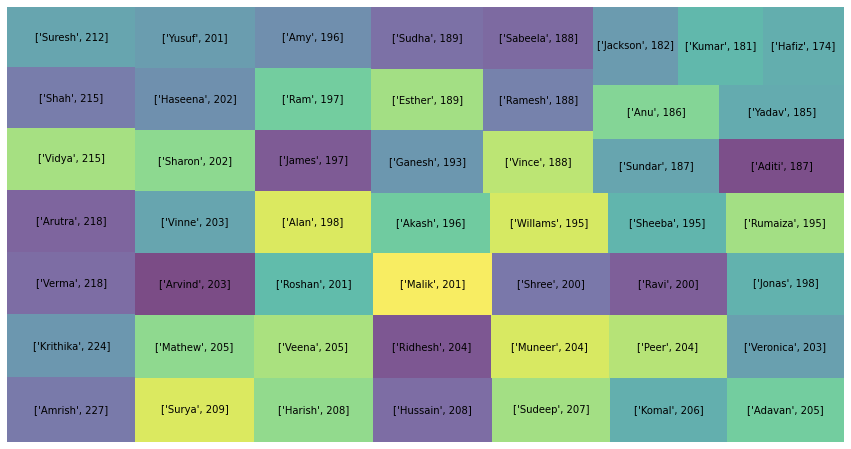

In [30]:
fig,ax =plt.subplots(figsize = (15,8))
squarify.plot(sizes = cust_cat.counts, label=cust_cat.labelled ,ax=ax,alpha = 0.7)
plt.axis("off")

# The most discounted product

In [24]:
dis_prod = record.loc[:,["Category", "Discount"]].groupby(["Category"]).sum()\
    .sort_values(["Discount"], ascending = False)
dis_prod

,Discount
Category,
"Eggs, Meat & Fish",339.41
Snacks,336.18
Fruits & Veggies,325.14
Beverages,322.46
Food Grains,319.51
Bakery,318.53
Oil & Masala,305.58


[Text(0.5, 1.0, 'Most discounted Category')]

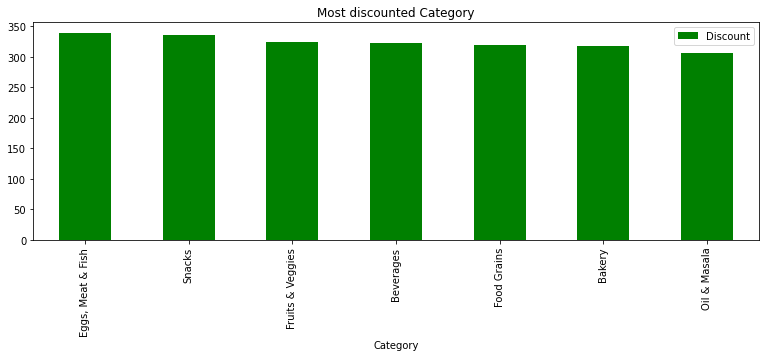

In [25]:
fig,ax1 =plt.subplots( figsize = (13,4))
dis_prod.plot(kind = "bar", y = 'Discount',ax=ax1, color = 'green')
ax1.set(title ="Most discounted Category")

#  most discounted category is Egg. Meat and Fish
